# San Francisco Housing Cost Analysis

In this assignment, you will perform fundamental analysis for the San Francisco housing market to allow potential real estate investors to choose rental investment properties.

In [1]:
# imports
import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
from panel.interact import interact
import warnings
warnings.filterwarnings('ignore')


Bad key "text.kerning_factor" on line 4 in
C:\Users\Glen\anaconda3\envs\pyvizenv_2\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
# Read the Mapbox API key
load_dotenv()
map_box_api = os.getenv("mapbox")

## Load Data

In [3]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path)
sfo_data.head(20)

year                   neighborhood  sale_price_sqr_foot  housing_units  \
0   2010                   Alamo Square           291.182945         372560   
1   2010                     Anza Vista           267.932583         372560   
2   2010                        Bayview           170.098665         372560   
3   2010               Buena Vista Park           347.394919         372560   
4   2010               Central Richmond           319.027623         372560   
5   2010                 Central Sunset           418.172493         372560   
6   2010                 Corona Heights           369.359338         372560   
7   2010                     Cow Hollow           569.379968         372560   
8   2010                  Croker Amazon           165.645730         372560   
9   2010                Diamond Heights           456.930822         372560   
10  2010                      Downtown            241.804552         372560   
11  2010  Eureka Valley/Dolores Heights           403.118313         372560   
12  2010                      Excelsior           364.928336         372560   
13  2010       Financial District North           401.749967         372560   
14  2010       Financial District South           162.821210         372560   
15  2010                  Forest Knolls           209.049327         372560   
16  2010                      Glen Park           715.586438         372560   
17  2010            Golden Gate Heights           551.801119         372560   
18  2010                 Haight Ashbury           254.473779         372560   
19  2010                   Hayes Valley           272.284980         372560   

    gross_rent  
0         1239  
1         1239  
2         1239  
3         1239  
4         1239  
5         1239  
6         1239  
7         1239  
8         1239  
9         1239  
10        1239  
11        1239  
12        1239  
13        1239  
14        1239  
15        1239  
16        1239  
17        1239  
18        1239  
19        1239

- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function.

**Hint:** Use the Pandas `groupby` function.

**Optional challenge:** Use the min, max, and std to scale the y limits of the chart.



In [4]:
# Calculate the mean number of housing units per year (hint: use groupby) 
housing_units_yrs_df = (
    sfo_data[['year','housing_units']]
    .groupby(['year'])
    
).mean()
housing_units_yrs_df.index.names = ['Year']
housing_units_yrs_df.columns = ['Housing Units Per Year']
housing_units_yrs_df.head(7)

Housing Units Per Year
Year                        
2010                  372560
2011                  374507
2012                  376454
2013                  378401
2014                  380348
2015                  382295
2016                  384242

In [5]:
# Calculate the max number of housing units per year 
housing_units_yrs_df_max = housing_units_yrs_df['Housing Units Per Year'].max()
housing_units_yrs_df_max

384242

In [6]:
# Calculate the min number of housing units per year 
housing_units_yrs_df_min = housing_units_yrs_df['Housing Units Per Year'].min()
housing_units_yrs_df_min

372560

In [7]:
# Calculate the std number of housing units per year 
housing_units_yrs_df_std = housing_units_yrs_df["Housing Units Per Year"].std()
housing_units_yrs_df_std 

4206.0007132667015

In [8]:
# Save the dataframe as a csv file
housing_units_yrs_csv = housing_units_yrs_df.to_csv()

[Text(0, 0.5, 'Housing Units Per Year')]

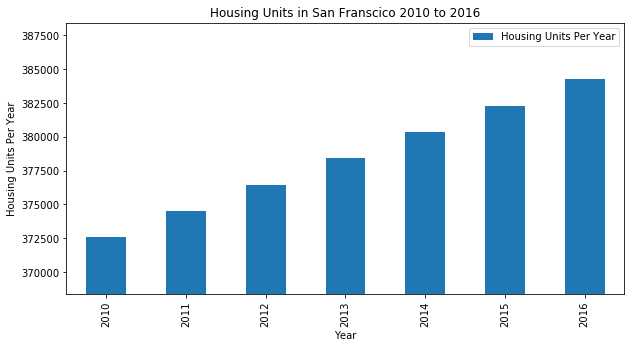

In [9]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.
# Optional Challenge: Use the min, max, and std to scale the y limits of the chart
housing_units_yrs_plot = housing_units_yrs_df.plot(kind='bar',ylim =[housing_units_yrs_df_min-housing_units_yrs_df_std, housing_units_yrs_df_max+housing_units_yrs_df_std], title ="Housing Units in San Franscico 2010 to 2016", figsize = (10,5))
housing_units_yrs_plot.set(ylabel = 'Housing Units Per Year')


- - - 

## Average Housing Costs in San Francisco Per Year

In this section, you will calculate the average monthly rent and the average price per square foot for each year. An investor may wish to better understand the sales price of the rental property over time. For example, a customer will want to know if they should expect an increase or decrease in the property value over time so they can determine how long to hold the rental property.  Plot the results as two line charts.

**Optional challenge:** Plot each line chart in a different color.

In [10]:
# Calculate the average sale price per square foot and average gross rent
sale_price_yrs_df = (
    sfo_data[['year','sale_price_sqr_foot','gross_rent']]
    .groupby(['year'])
    
).mean()
sale_price_yrs_df.index.names = ['Year']
sale_price_yrs_df.columns = ['Average Sale Price per Square Foot','Average Monthly Rent']
sale_price_yrs_df.head()

Average Sale Price per Square Foot  Average Monthly Rent
Year                                                          
2010                          369.344353                  1239
2011                          341.903429                  1530
2012                          399.389968                  2324
2013                          483.600304                  2971
2014                          556.277273                  3528

[Text(0, 0.5, 'Average Monthly Rent')]

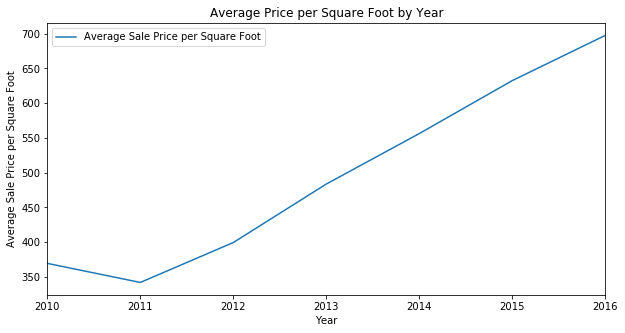

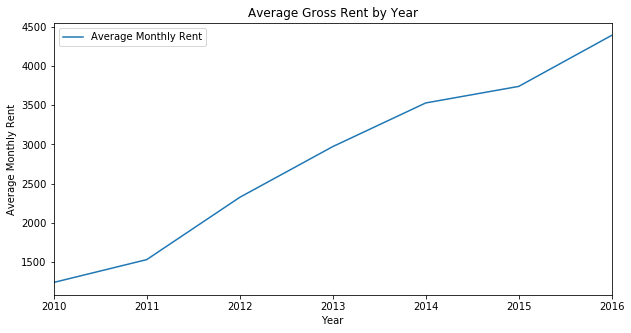

In [11]:
# Create two line charts, one to plot the average sale price per square foot and another for average montly rent

# Line chart for average sale price per square foot
avg_price_plot = sale_price_yrs_df.plot(kind='line', y = 'Average Sale Price per Square Foot', title ="Average Price per Square Foot by Year", figsize=(10,5))
avg_price_plot.set(ylabel='Average Sale Price per Square Foot')

# Line chart for average montly rent
avg_monthly_rent_plot = sale_price_yrs_df.plot(kind='line', y = 'Average Monthly Rent', title ="Average Gross Rent by Year", figsize=(10,5))
avg_monthly_rent_plot.set(ylabel='Average Monthly Rent')

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create two interactive visulizations of average prices with a dropdown selector for the neighborhood. The first visualization will be a line plot showing the trend of average price per square foot over time for each neighborhood.  The second will be a line plot showing the trend of average montly rent over time for each neighborhood.

**Hint:** It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [12]:
# Group by year and neighborhood and then create a new dataframe of the mean values
#sfo_data_reset = sfo_data.reset_index(drop=True)
avg_price_neigh_df = (
    sfo_data
    .groupby(['year', 'neighborhood'])
    
).mean()
avg_price_neigh_df.reset_index(inplace=True)
avg_price_neigh_df.head(10)

year      neighborhood  sale_price_sqr_foot  housing_units  gross_rent
0  2010      Alamo Square           291.182945         372560        1239
1  2010        Anza Vista           267.932583         372560        1239
2  2010           Bayview           170.098665         372560        1239
3  2010  Buena Vista Park           347.394919         372560        1239
4  2010  Central Richmond           319.027623         372560        1239
5  2010    Central Sunset           418.172493         372560        1239
6  2010    Corona Heights           369.359338         372560        1239
7  2010        Cow Hollow           569.379968         372560        1239
8  2010     Croker Amazon           165.645730         372560        1239
9  2010   Diamond Heights           456.930822         372560        1239

In [26]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
list_of_neighborhoods = avg_price_neigh_df["neighborhood"]
def average_price_per_year(neighborhood):
    choosen_neighborhood = avg_price_neigh_df[avg_price_neigh_df["neighborhood"] == neighborhood]
    return choosen_neighborhood.hvplot.line(x = 'year', y ='sale_price_sqr_foot', xlabel = 'Year', ylabel = 'Average Sale Price per Square Foot')

interact(average_price_per_year, neighborhood=list_of_neighborhoods)



Column
    [0] Column
        [0] Select(name='neighborhood', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] HoloViews(Curve, name='interactive03314')

In [24]:
# Use hvplot to create an interactive line chart of the average monthly rent.
# The plot should have a dropdown selector for the neighborhood
def choose_neighborhood(neighborhood):
    choosen_neighborhood = avg_price_neigh_df[avg_price_neigh_df["neighborhood"] == neighborhood]
    return choosen_neighborhood.hvplot.line(x = 'year', y ='gross_rent', xlabel = 'Year', ylabel = 'Average Monthly Rent')




list_of_neighborhoods = avg_price_neigh_df["neighborhood"]
interact(choose_neighborhood, neighborhood=list_of_neighborhoods)

Column
    [0] Column
        [0] Select(name='neighborhood', options=['Alamo Square', ...], value='Alamo Square')
    [1] Row
        [0] HoloViews(Curve, name='interactive02565')

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price per square foot for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [121]:
# Getting the data from the top 10 expensive neighborhoods to own
avg_price_neigh_df = (
    sfo_data
    .groupby([ 'neighborhood'])
    
).mean()
most_expensive = avg_price_neigh_df.sort_values(['sale_price_sqr_foot'], ascending=False)[:10]
most_expensive = most_expensive.drop(columns = ['year'])
most_expensive = most_expensive.reset_index()
most_expensive.columns = ['Neighborhood', 'Average Sale Price per Square Foot', 'Average Housing Units', "Average Monthly Rent"]
most_expensive

Neighborhood  Average Sale Price per Square Foot  \
0  Union Square District                          903.993258   
1         Merced Heights                          788.844818   
2          Miraloma Park                          779.810842   
3        Pacific Heights                          689.555817   
4          Westwood Park                          687.087575   
5         Telegraph Hill                          676.506578   
6       Presidio Heights                          675.350212   
7             Cow Hollow                          665.964042   
8           Potrero Hill                          662.013613   
9            South Beach                          650.124479   

   Average Housing Units  Average Monthly Rent  
0              377427.50           2555.166667  
1              380348.00           3414.000000  
2              375967.25           2155.250000  
3              378401.00           2817.285714  
4              382295.00           3959.000000  
5              378401.00           2817.285714  
6              378401.00           2817.285714  
7              378401.00           2817.285714  
8              378401.00           2817.285714  
9              375805.00           2099.000000

[Text(0, 0.5, 'Average Sale Price per Square Foot'),
 Text(0.5, 0, 'Neighborhood')]

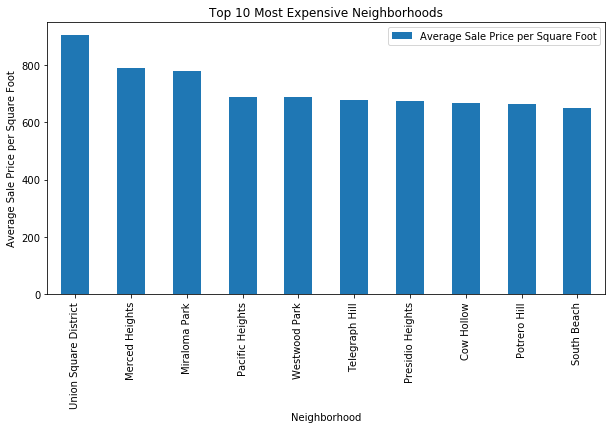

In [56]:
# Plotting the data from the top 10 expensive neighborhoods
most_expensive_plot = most_expensive.plot(kind='bar', x = 'Neighborhood', y = 'Average Sale Price per Square Foot', title = 'Top 10 Most Expensive Neighborhoods', figsize= (10,5))
most_expensive_plot.set(xlabel = 'Neighborhood', ylabel = 'Average Sale Price per Square Foot')

- - - 

## Comparing cost to purchase versus rental income

In this section, you will use `hvplot` to create an interactive visualization with a dropdown selector for the neighborhood. This visualization will feature a side-by-side comparison of average price per square foot versus average montly rent by year.  

**Hint:** Use the `hvplot` parameter, `groupby`, to create a dropdown selector for the neighborhood.

In [68]:
# Fetch the previously generated DataFrame that was grouped by year and neighborhood
avg_price_neigh_df = (
    sfo_data
    .groupby(['year', 'neighborhood'])
    
).mean()
avg_price_neigh_df.reset_index(inplace=True)
avg_price_neigh_df.head(10)

year      neighborhood  sale_price_sqr_foot  housing_units  gross_rent
0  2010      Alamo Square           291.182945         372560        1239
1  2010        Anza Vista           267.932583         372560        1239
2  2010           Bayview           170.098665         372560        1239
3  2010  Buena Vista Park           347.394919         372560        1239
4  2010  Central Richmond           319.027623         372560        1239
5  2010    Central Sunset           418.172493         372560        1239
6  2010    Corona Heights           369.359338         372560        1239
7  2010        Cow Hollow           569.379968         372560        1239
8  2010     Croker Amazon           165.645730         372560        1239
9  2010   Diamond Heights           456.930822         372560        1239

In [84]:
# Getting the data from the top 10 expensive neighborhoods to own
avg_price_neigh_df = (
    sfo_data
    .groupby(['year','neighborhood'])
    
).mean()
most_expensive = avg_price_neigh_df.sort_values(['sale_price_sqr_foot'], ascending=False)
most_expensive = most_expensive.reset_index()
most_expensive.columns = ['Year','Neighborhood', 'Average Sale Price per Square Foot', 'Average Housing Units', "Average Monthly Rent"]
most_expensive

Year                   Neighborhood  Average Sale Price per Square Foot  \
0    2015          Union Square District                         2258.702832   
1    2016               Presidio Heights                         1465.968586   
2    2016                 Merced Heights                         1416.666667   
3    2013          Union Square District                         1290.472107   
4    2014                  Miraloma Park                         1267.766203   
5    2016      Parnassus/Ashbury Heights                         1207.997485   
6    2016                Outer Richmond                          1196.645437   
7    2015                         Marina                         1132.837361   
8    2014                South of Market                         1119.838877   
9    2015                 Corona Heights                         1100.791194   
10   2016                     Cow Hollow                         1059.065602   
11   2014                   Potrero Hill                         1045.201546   
12   2010                    South Beach                         1037.099789   
13   2016  Eureka Valley/Dolores Heights                         1026.791108   
14   2016                   Russian Hill                         1024.339877   
15   2015                 Telegraph Hill                          996.990220   
16   2016                Pacific Heights                          996.389364   
17   2016                Bernal Heights                           986.842105   
18   2016                     Twin Peaks                          970.085470   
19   2015                    Yerba Buena                          963.522606   
20   2013            Golden Gate Heights                          956.184122   
21   2016                      Glen Park                          945.566502   
22   2016                    Mission Bay                          924.569116   
23   2015                  Lone Mountain                          918.288268   
24   2015                Pacific Heights                          910.187690   
25   2016                 Telegraph Hill                          903.049771   
26   2015               North Waterfront                          890.909593   
27   2014                 Corona Heights                          888.182144   
28   2016                Mission Terrace                          879.017013   
29   2016               Buena Vista Park                          851.401405   
..    ...                            ...                                 ...   
367  2014                    Mission Bay                          220.111087   
368  2011                       Parkside                          217.558787   
369  2013               Western Addition                          217.089069   
370  2010               Western Addition                          215.569134   
371  2016                     Park North                          211.301370   
372  2010                  Forest Knolls                          209.049327   
373  2011                        Portola                          208.167997   
374  2010                 Inner Parkside                          199.702004   
375  2011              Ingleside Heights                          198.015873   
376  2015                     Ingleside                           192.165248   
377  2012                   Alamo Square                          183.099317   
378  2016                   Hayes Valley                          175.066069   
379  2011                        Bayview                          172.540562   
380  2011               Buena Vista Park                          171.772347   
381  2010                  Hunters Point                          170.624920   
382  2014                 Silver Terrace                          170.292549   
383  2010                        Bayview                          170.098665   
384  2012                        Bayview                          165.798062   
385  

In [90]:
# Plotting the data from the top 10 expensive neighborhoods
def choose_neighborhood(neighborhood):
    choosen_neighborhood = most_expensive[most_expensive["Neighborhood"] == neighborhood]
    return choosen_neighborhood.hvplot.bar(x = 'Year', y =['Average Sale Price per Square Foot','Average Monthly Rent'], xlabel = 'Year', ylabel = 'Currency (USD)',rot=90, height=600)




list_of_neighborhoods = most_expensive["Neighborhood"]
interact(choose_neighborhood, neighborhood=list_of_neighborhoods)

Column
    [0] Column
        [0] Select(name='neighborhood', options=['Union Square District', ...], value='Union Square District')
    [1] Row
        [0] HoloViews(Bars, name='interactive04842')

- - - 

## Neighborhood Map

In this section, you will read in neighborhoods location data and build an interactive map with the average house value per neighborhood. Use a `scatter_mapbox` from Plotly express to create the visualization. Remember, you will need your Mapbox API key for this.

### Load Location Data

In [91]:

# Load neighborhoods coordinates data
neighborhoods_coordinates_data = pd.read_csv(
    Path("Data/neighborhoods_coordinates.csv")
).dropna()
neighborhoods_coordinates_data.head()

Neighborhood        Lat         Lon
0     Alamo Square  37.791012 -122.402100
1       Anza Vista  37.779598 -122.443451
2          Bayview  37.734670 -122.401060
3  Bayview Heights  37.728740 -122.410980
4   Bernal Heights  37.728630 -122.443050

### Data Preparation

You will need to join the location data with the mean values per neighborhood.

1. Calculate the mean values for each neighborhood.

2. Join the average values with the neighborhood locations.

In [97]:
# Calculate the mean values for each neighborhood
avg_price_neigh_df = (
    sfo_data
    .groupby(['neighborhood'])
    
).mean()
neighborhood_means = avg_price_neigh_df.reset_index(inplace=True)
neighborhood_means = avg_price_neigh_df.drop(columns = ['year'])
neighborhood_means.columns = ['Neighborhood', 'Average Sale Price per Square Foot', 'Average Housing Units', "Average Monthly Rent"]
neighborhood_means.head(10)

Neighborhood  Average Sale Price per Square Foot  \
0       Alamo Square                          366.020712   
1         Anza Vista                          373.382198   
2            Bayview                          204.588623   
3    Bayview Heights                          590.792839   
4    Bernal Heights                           576.746488   
5   Buena Vista Park                          452.680591   
6   Central Richmond                          394.422399   
7     Central Sunset                          423.687928   
8  Clarendon Heights                          487.244886   
9     Corona Heights                          587.539067   

   Average Housing Units  Average Monthly Rent  
0               378401.0           2817.285714  
1               379050.0           3031.833333  
2               376454.0           2318.400000  
3               382295.0           3739.000000  
4               379374.5           3080.333333  
5               378076.5           2698.833333  
6               378401.0           2817.285714  
7               378401.0           2817.285714  
8               376454.0           2250.500000  
9               377232.8           2472.000000

In [107]:
# Join the average values with the neighborhood locations
neighborhoods_coordinates_data_join = neighborhoods_coordinates_data.set_index('Neighborhood').join(neighborhood_means.set_index('Neighborhood')).reset_index().dropna()
neighborhoods_coordinates_data_join

Neighborhood        Lat         Lon  \
0                    Alamo Square  37.791012 -122.402100   
1                      Anza Vista  37.779598 -122.443451   
2                         Bayview  37.734670 -122.401060   
3                 Bayview Heights  37.728740 -122.410980   
5                Buena Vista Park  37.768160 -122.439330   
6                Central Richmond  37.777890 -122.445170   
7                  Central Sunset  37.749610 -122.489990   
8               Clarendon Heights  37.753310 -122.447030   
9                  Corona Heights  37.785530 -122.456000   
10                     Cow Hollow  37.792980 -122.435790   
11                  Croker Amazon  37.722800 -122.438690   
12                Diamond Heights  37.728630 -122.443050   
14                Duboce Triangle  37.769640 -122.426110   
15  Eureka Valley/Dolores Heights  37.755540 -122.437790   
16                      Excelsior  37.728740 -122.410980   
17       Financial District North  37.791010 -122.402100   
18       Financial District South  37.791010 -122.402100   
19                  Forest Knolls  37.757060 -122.455090   
20                      Glen Park  37.728630 -122.443050   
21            Golden Gate Heights  37.757912 -122.464020   
22                 Haight Ashbury  37.765250 -122.435960   
23                   Hayes Valley  37.765250 -122.435960   
24                  Hunters Point  37.725510 -122.371780   
26              Ingleside Heights  37.721160 -122.487070   
27                  Inner Mission  37.754160 -122.419470   
28                 Inner Parkside  37.749610 -122.489990   
29                 Inner Richmond  37.769112 -122.483566   
30                   Inner Sunset  37.749610 -122.489970   
31     Jordan Park/Laurel Heights  37.785530 -122.456000   
32            Lake --The Presidio  37.801520 -122.454570   
..                            ...        ...         ...   
42                       Nob Hill  37.792980 -122.435790   
43                     Noe Valley  37.753310 -122.447030   
44                    North Beach  37.800550 -122.404330   
45               North Waterfront  37.800550 -122.404330   
46                      Oceanview  37.719930 -122.465950   
47                  Outer Mission  37.722800 -122.438690   
48                 Outer Parkside  37.751700 -122.446000   
50                   Outer Sunset  37.749610 -122.489990   
51                Pacific Heights  37.792980 -122.435790   
52                     Park North  37.728380 -122.478510   
53                       Parkside  37.749610 -122.489990   
54      Parnassus/Ashbury Heights  37.763550 -122.457650   
55                        Portola  37.734670 -122.401060   
56                   Potrero Hill  37.731960 -122.383240   
57               Presidio Heights  37.785530 -122.456000   
58                   Russian Hill  37.792980 -122.435790   
59                 Silver Terrace  37.734670 -122.401060   
60                    South Beach  37.783230 -122.400650   
61                South of Market  37.791010 -122.402100   
62                      Sunnyside  37.734150 -122.457000   
63                 Telegraph Hill  37.800550 -122.404330   
64                     Twin Peaks  37.753311 -122.447029   
65          Union Square District  37.791010 -122.402100   
66         Van Ness/ Civic Center  37.779510 -122.420220   
67              Visitacion Valley  37.728740 -122.410980   
68                    West Portal  37.740260 -122.463880   
69               Western Addition  37.792980 -122.435790   
70             Westwood Highlands  37.734700 -122.456854   
71                  Westwood Park  37.734150 -122.457000   
72                    Yerba Buena  37.792980 -122.396360   

    Average Sale Price per Square Foot  Average Housing Units  \
0                           366.020712              378401.00   
1                           373.382198              379050.00   
2                           204.588623              376454.00   
3                           590.792839  

### Mapbox Visualization

Plot the average values per neighborhood using a Plotly express `scatter_mapbox` visualization.

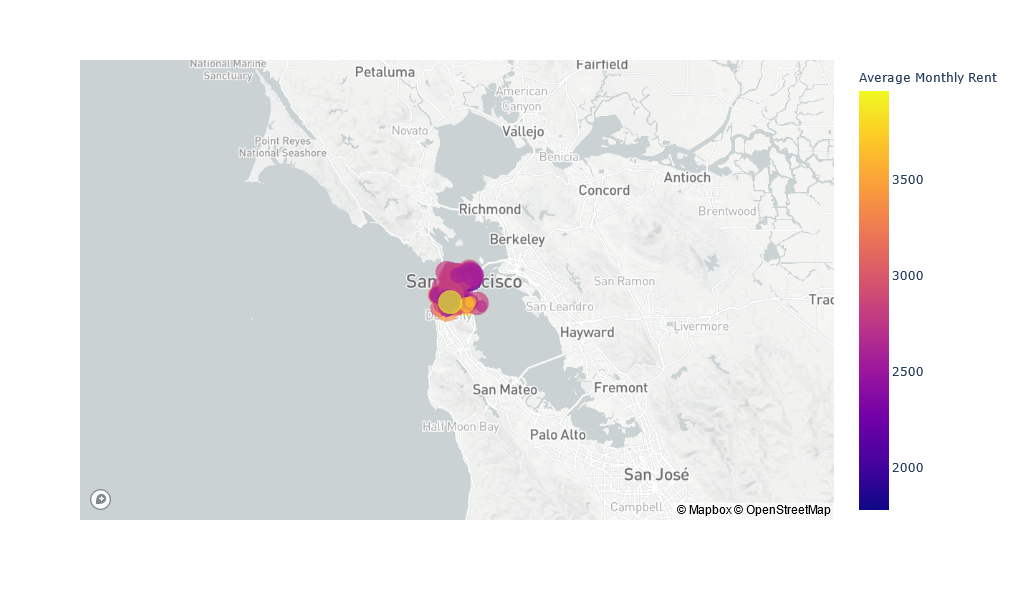

In [109]:
# Set the Mapbox API
px.set_mapbox_access_token(map_box_api)
# Create a scatter mapbox to analyze neighborhood info
map_1 = px.scatter_mapbox(
    neighborhoods_coordinates_data_join,
    lat="Lat",
    lon="Lon",
    color="Average Monthly Rent",
    size="Average Sale Price per Square Foot",
    height = 600
)
map_1.show()

- - -

## Cost Analysis - Optional Challenge

In this section, you will use Plotly express to create visualizations that investors can use to interactively filter and explore various factors related to the house value of the San Francisco's neighborhoods. 

### Create a DataFrame showing the most expensive neighborhoods in San Francisco by year

In [20]:
# Fetch the data from all expensive neighborhoods per year.
df_expensive_neighborhoods_per_year = df_costs[df_costs["neighborhood"].isin(df_expensive_neighborhoods["neighborhood"])]
df_expensive_neighborhoods_per_year.head()

year      neighborhood  sale_price_sqr_foot  housing_units  gross_rent
7   2010        Cow Hollow           569.379968         372560        1239
31  2010     Miraloma Park           680.608729         372560        1239
41  2010   Pacific Heights           496.516014         372560        1239
46  2010      Potrero Hill           491.450004         372560        1239
47  2010  Presidio Heights           549.417931         372560        1239

### Create a parallel coordinates plot and parallel categories plot of most expensive neighborhoods in San Francisco per year


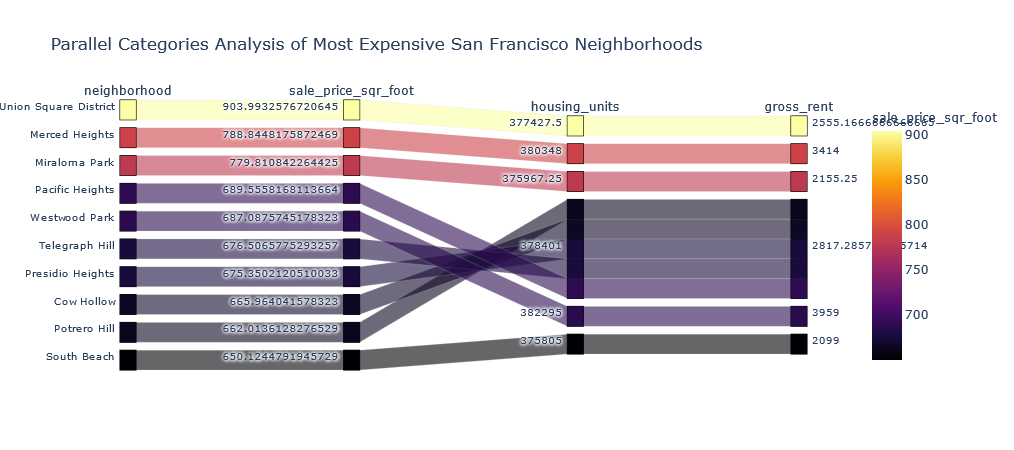

In [21]:
# Parallel Categories Plot
# YOUR CODE HERE!

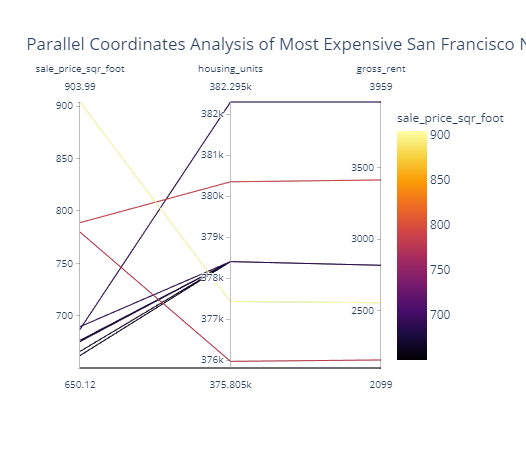

In [22]:
# Parallel Coordinates Plot
# YOUR CODE HERE!

### Create a sunburst chart to conduct a costs analysis of most expensive neighborhoods in San Francisco per year

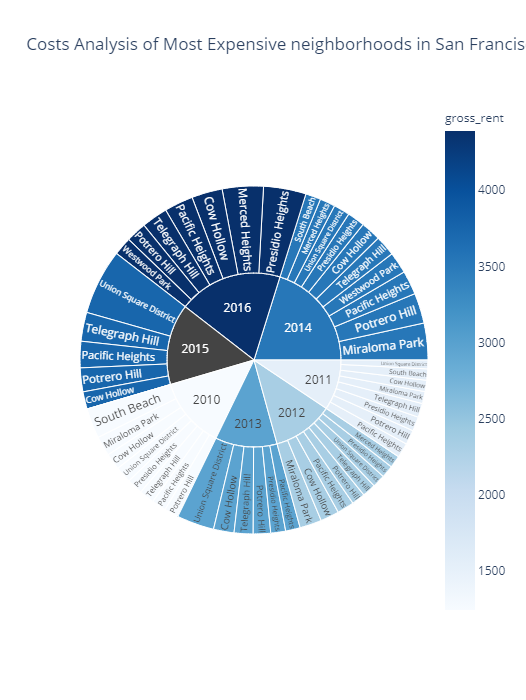

In [23]:
# Sunburst Plot
# YOUR CODE HERE!